#### IMPORTANTO BIBLIOTECAS

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow import keras

#### VERIFICANDO O RECONHECIMENTO DA GPU

In [2]:
# DESCOMENTAR PARA FORÇAR A RODAR EM CPU
# import os

# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# if tf.test.gpu_device_name():
#     print('GPU found')
# else:
#     print("No GPU found")

In [9]:
print("Num GPUs Available: ", 
          len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


#### CARREGANDO CONJUNTO DE DADOS

In [50]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

#### SEPARANDO CONJUNTO DE TREINO E VALIDAÇÃO

In [51]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.0



#### CRIANDO HASH PARA IMPRIMIR O NOME DAS CLASSES

In [52]:
class_names = ["0","1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [53]:
class_names[y_train[1]]

'3'

#### VISUALIZANDO IMAGENS DO CONJUNTO DE DADOS

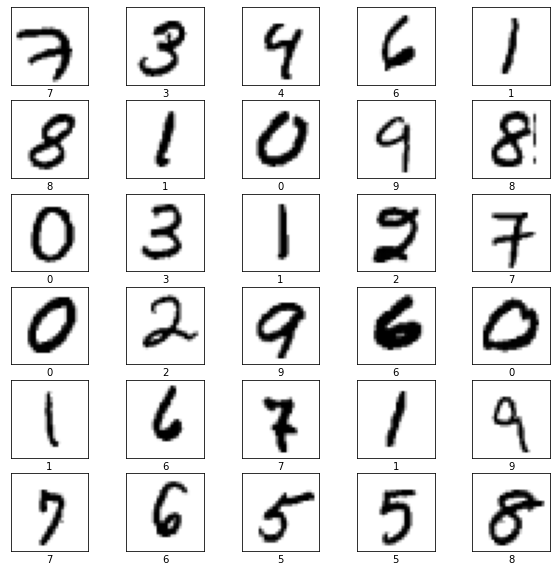

In [54]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

#### INSTACIANDO MODELO

In [55]:
model = keras.models.Sequential([
    
########## MLP    
keras.layers.Flatten(input_shape=[28, 28]),
# keras.layers.Dense(9000, activation="relu"),
# keras.layers.Dense(3000, activation="relu"),
# keras.layers.Dense(1000, activation="relu"),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),

########## LSTM
# keras.layers.LSTM(784, activation='relu', input_shape=[28, 28]),
    
########## Stacked LSTM
# keras.layers.LSTM(784, activation='relu', return_sequences=True, input_shape=[28, 28]),
# keras.layers.LSTM(250, activation='relu', return_sequences=True),
# keras.layers.LSTM(90, activation='relu', return_sequences=True),
# keras.layers.LSTM(30, activation='relu'),
    
########## Bidirectional LSTM
# keras.layers.Bidirectional(keras.layers.LSTM(100, activation='relu'), input_shape=[28, 28]),
    
keras.layers.Dense(10, activation="softmax")
])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### COMPILANDO MODELO

In [57]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

#### TREINANDO MODELO

In [58]:
# callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')]

# callbacks.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, restore_best_weights=True))


history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
#                     callbacks=callbacks
                   )

Epoch 1/50
1719/1719 [==============================] - 1s 770us/step - loss: 0.5950 - accuracy: 0.8471 - val_loss: 0.3054 - val_accuracy: 0.9164
Epoch 2/50
1719/1719 [==============================] - 1s 715us/step - loss: 0.2880 - accuracy: 0.9179 - val_loss: 0.2438 - val_accuracy: 0.9334
Epoch 3/50
1719/1719 [==============================] - 1s 713us/step - loss: 0.2355 - accuracy: 0.9333 - val_loss: 0.2052 - val_accuracy: 0.9436
Epoch 4/50
1719/1719 [==============================] - 1s 717us/step - loss: 0.2017 - accuracy: 0.9425 - val_loss: 0.1751 - val_accuracy: 0.9498
Epoch 5/50
1719/1719 [==============================] - 1s 714us/step - loss: 0.1762 - accuracy: 0.9491 - val_loss: 0.1578 - val_accuracy: 0.9570
Epoch 6/50
1719/1719 [==============================] - 1s 717us/step - loss: 0.1562 - accuracy: 0.9550 - val_loss: 0.1451 - val_accuracy: 0.9596
Epoch 7/50
1719/1719 [==============================] - 1s 718us/step - loss: 0.1397 - accuracy: 0.9601 - val_loss: 0.1369 -

#### AVALIANDO MODELO

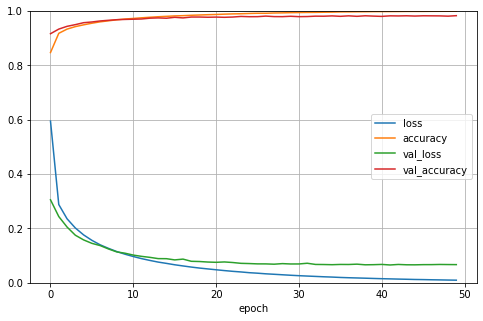

In [59]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('epoch')
plt.show()

In [60]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 497us/step - loss: 0.0675 - accuracy: 0.9801


[0.06754180043935776, 0.9800999760627747]

#### CLASSIFICANDO EXEMPLOS

In [61]:
X_new = X_test[:30]
y_pred = np.argmax(model.predict(X_new), axis=-1)

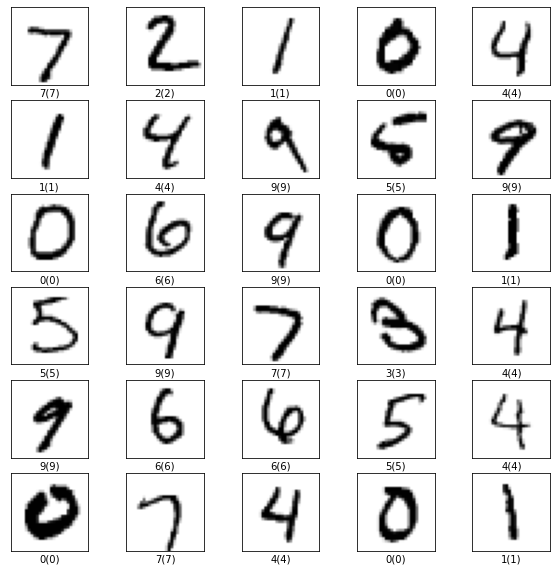

In [62]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel((class_names[y_test[i]]+'('+class_names[y_pred[i]]+')'))
plt.show()